In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from collections import Counter
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('clean_reviews.csv')
df.shape

(39723, 6)

In [3]:
df.head()

,text,label,clean_text,total_words,total_char,total_sent
0,i grew up (b. 1965) watching and loving the th...,0,"['grew', 'b', '1965', 'watch', 'love', 'thunde...",89,622,17
1,"when i put this movie in my dvd player, and sa...",0,"['put', 'movi', 'dvd', 'player', 'sat', 'coke'...",94,649,8
2,why do people who do not know what a particula...,0,"['peopl', 'not', 'know', 'particular', 'time',...",96,623,9
3,even though i have great interest in biblical ...,0,"['even', 'though', 'great', 'interest', 'bibli...",34,216,5
4,i am a die hard dads army fan and nothing will...,1,"['die', 'hard', 'dad', 'armi', 'fan', 'noth', ...",57,335,5


In [4]:
df = df.iloc[:,1:]

In [5]:
df['label'].value_counts()

label
1    19908
0    19815
Name: count, dtype: int64

In [7]:
## Data look balanced

In [6]:
df.duplicated().sum()

29

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,label,total_words,total_char,total_sent
count,39694.000000,39694.000000,39694.000000,39694.000000
mean,0.501159,71.237391,488.817076,6.949186
std,0.500005,49.159545,346.212750,4.994443
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,259.000000,4.000000
50%,1.000000,63.000000,427.000000,6.000000
75%,1.000000,88.000000,604.000000,9.000000
max,1.000000,564.000000,3862.000000,282.000000


In [9]:
df[df['label']==0].describe()

,label,total_words,total_char,total_sent
count,19801.0,19801.000000,19801.000000,19801.000000
mean,0.0,70.715671,480.852684,7.072320
std,0.0,48.956724,340.864041,4.906697
min,0.0,0.000000,0.000000,0.000000
25%,0.0,38.000000,254.000000,4.000000
50%,0.0,63.000000,424.000000,6.000000
75%,0.0,88.000000,596.000000,9.000000
max,0.0,564.000000,3862.000000,73.000000


In [10]:
df[df['label']==1].describe()

,label,total_words,total_char,total_sent
count,19893.0,19893.000000,19893.000000,19893.000000
mean,1.0,71.756698,496.744634,6.826622
std,0.0,49.356354,351.285184,5.077437
min,1.0,0.000000,0.000000,0.000000
25%,1.0,39.000000,265.000000,4.000000
50%,1.0,63.000000,429.000000,6.000000
75%,1.0,89.000000,612.000000,9.000000
max,1.0,551.000000,3786.000000,282.000000


In [25]:
## distribution of total words , total_char and total sent look similar for positive as well as negative sentiment.
## Correlation matrix also shows there is weak correlation of total words with label 

## we can drop total_words,total_char,total_sent

In [11]:
df.corr(numeric_only=True)

,label,total_words,total_char,total_sent
label,1.000000,0.010588,0.022951,-0.024597
total_words,0.010588,1.000000,0.993819,0.751785
total_char,0.022951,0.993819,1.000000,0.724771
total_sent,-0.024597,0.751785,0.724771,1.000000


In [12]:
corpus_negative = []
for text in df[df['label']==0]['clean_text'].values:
    text = ast.literal_eval(text)
    for word in text:
        corpus_negative.append(word)

In [17]:
word_counts = Counter(corpus_negative)
neg_word_df = pd.DataFrame(word_counts.most_common(50),columns = ['negative_words','frequency'])

In [18]:
corpus_positive = []
for text in df[df['label']==1]['clean_text'].values:
    text = ast.literal_eval(text)
    for word in text:
        corpus_positive.append(word)

In [19]:
word_counts_positive = Counter(corpus_positive)
positive_word_df = pd.DataFrame(word_counts_positive.most_common(50),columns = ['positive_words','frequency'])

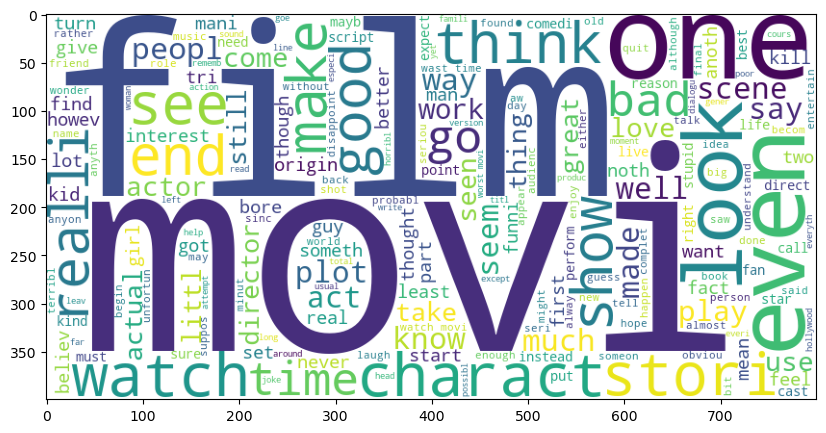

In [20]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(corpus_negative))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.show()

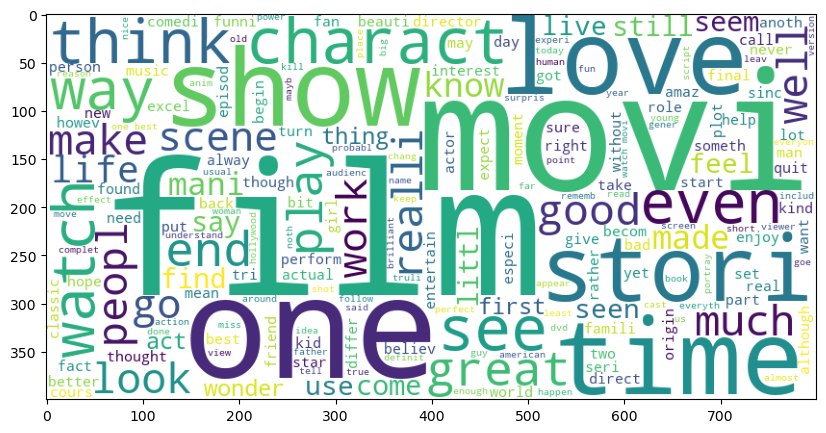

In [21]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(" ".join(corpus_positive))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive)
plt.show()

In [23]:
all_df = pd.concat([neg_word_df,positive_word_df],axis = 1)

In [44]:
negative_words = []
for i in list(all_df['negative_words']):
    if i not in list(all_df['positive_words']):
        negative_words.append(i)

negative_words

['bad',
 'plot',
 'want',
 'ever',
 'better',
 'tri',
 'seem',
 'actor',
 'worst',
 'give',
 'actual']

In [45]:
positive_words = []
for i in list(all_df['positive_words']):
    if i not in list(all_df['negative_words']):
        positive_words.append(i)

positive_words

['great',
 'love',
 'best',
 'year',
 'mani',
 'life',
 'work',
 'enjoy',
 'still',
 'littl',
 'perform']

In [46]:
def positive(x):
    counter = 0
    for i in ast.literal_eval(x):
        if i in positive_words:
            counter = counter+1

    return counter

In [60]:

def negative(x):
    counter = 0
    for i in ast.literal_eval(x):
        if i in negative_words:
            return 1     
    return counter

In [61]:
df['positive_words'] = df['clean_text'].apply(positive)
df['negative_words'] = df['clean_text'].apply(negative)

In [62]:
df[df['label']==1]['positive_words'].value_counts()

positive_words
1     4821
0     4041
2     3906
3     2690
4     1769
5     1045
6      685
7      348
8      228
9      130
10      92
11      42
12      32
13      21
15      11
14      11
16       9
17       6
20       2
19       2
18       2
Name: count, dtype: int64

In [63]:
df[df['label']==0]['negative_words'].value_counts()

negative_words
1     4878
0     4698
2     3807
3     2603
4     1528
5      996
6      542
7      312
8      179
9       91
10      83
11      39
12      12
14       8
13       8
15       6
16       5
19       2
17       2
18       1
22       1
Name: count, dtype: int64

C:\Users\kapil\AppData\Local\Temp\ipykernel_3344\3788678219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['label']==0]['negative_words'])
C:\Users\kapil\AppData\Local\Temp\ipykernel_3344\3788678219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['label']==1]['positive_words

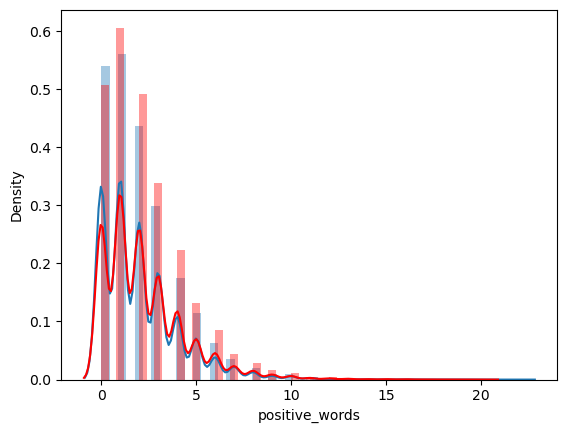

In [66]:
sns.distplot(df[df['label']==0]['negative_words'])
sns.distplot(df[df['label']==1]['positive_words'],color='red');